In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from scripts.functions import powernoise, logistic_map
import seaborn as sns
import math
from scipy import stats
from ipykernel import kernelapp as app
import warnings
warnings.filterwarnings('ignore')
from pmodel import *

In [3]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [12]:
# white_noise_normalize = powernoise(beta=0, N=2**12, varargin='normalize')
# white_noise_ranpower = powernoise(beta=0, N=2**12, varargin='ranpower')

# pink_noise_normalize = powernoise(beta=1, N=2**12, varargin='normalize')
# pink_noise_ranpower = powernoise(beta=1, N=2**12, varargin='ranpower')

# red_noise_normalize = powernoise(beta=2, N=2**12, varargin='normalize')
# red_noise_ranpower = powernoise(beta=2, N=2**12, varargin='ranpower')

# s1 = white_noise_normalize
# s2 = pink_noise_normalize
# s3 = red_noise_normalize

s1 = pd.read_csv('./datasets/s1.csv')
s2 = pd.read_csv('./datasets/s2.csv')
s3 = pd.read_csv('./datasets/s3.csv')

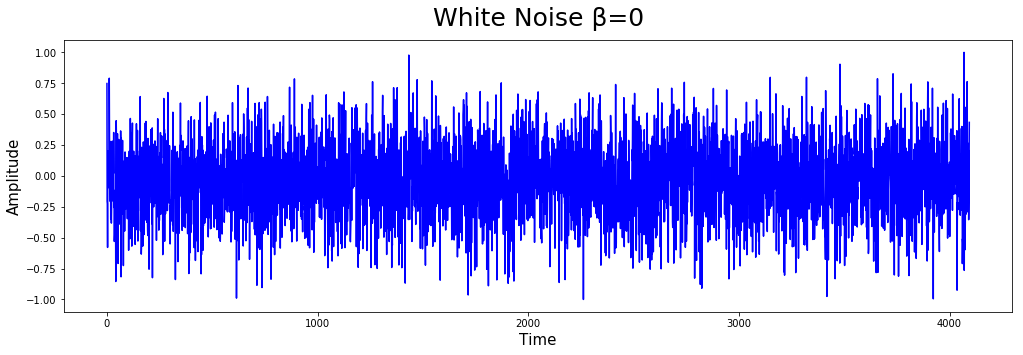

In [17]:
plt.figure(figsize=(17, 5))
plt.title('White Noise β=0', fontdict={'fontsize': '25'}, y=1.03)
plt.xlabel('Time', fontdict={'fontsize': '15'})
plt.ylabel('Amplitude', fontdict={'fontsize': '15'})
plt.plot(s1, color='#0100FF')
plt.savefig('./images/s1.png', format='png', dpi=400)
plt.show()

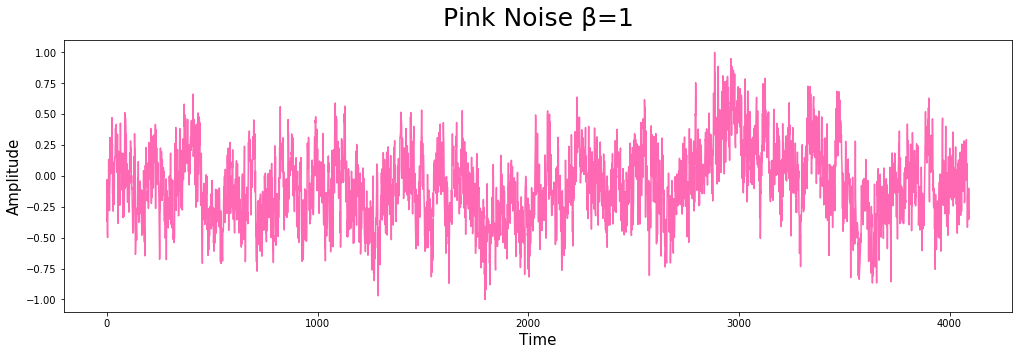

In [19]:
plt.figure(figsize=(17, 5))
plt.title('Pink Noise β=1', fontdict={'fontsize': '25'}, y=1.03)
plt.xlabel('Time', fontdict={'fontsize': '15'})
plt.ylabel('Amplitude', fontdict={'fontsize': '15'})
plt.plot(s2, color='hotpink')
plt.savefig('./images/s2.png', format='png', dpi=400)
plt.show()

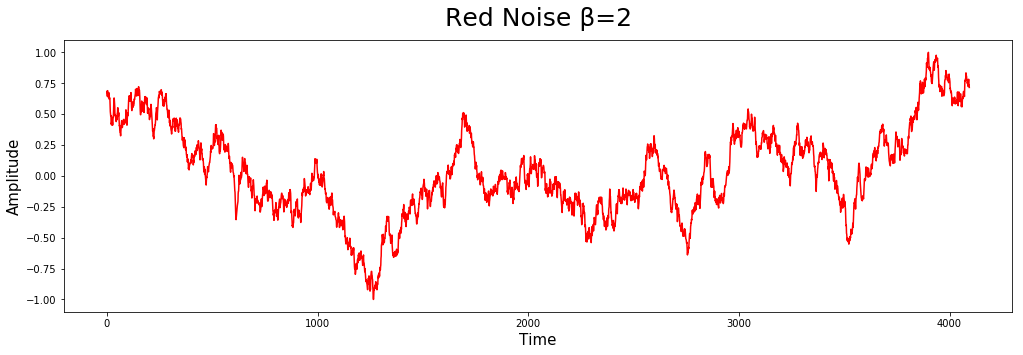

In [20]:
plt.figure(figsize=(17, 5))
plt.title('Red Noise β=2', fontdict={'fontsize': '25'}, y=1.03)
plt.xlabel('Time', fontdict={'fontsize': '15'})
plt.ylabel('Amplitude', fontdict={'fontsize': '15'})
plt.plot(s3, color='red')
plt.savefig('./images/s3.png', format='png', dpi=400)
plt.show()

In [68]:
# aa = np.ndarray(s1)
# bb = np.ndarray(s4)

ValueError: sequence too large; cannot be greater than 32

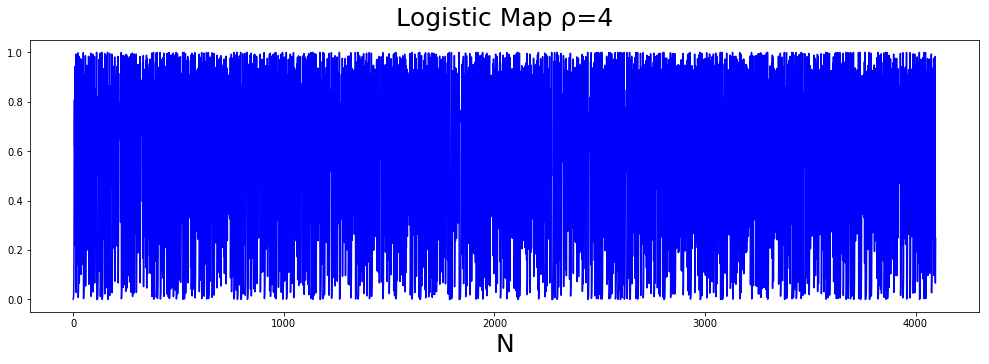

In [43]:
# s4 = logistic_map(rho=4, a0=0.001, n=4096)
# s4 = pd.DataFrame(s4)
# s4.to_csv('./datasets/s4.csv', index=False)
s4 = pd.read_csv('./datasets/s4.csv')

plt.figure(figsize=(17, 5))
plt.title('Logistic Map ρ=4', fontdict={'fontsize': '25'}, y=1.03)
plt.xlabel('N', fontdict={'fontsize': '25'})
plt.plot(s4, color='#0000FF')
plt.savefig('./images/s4.png', format='png', dpi=400)
plt.show()

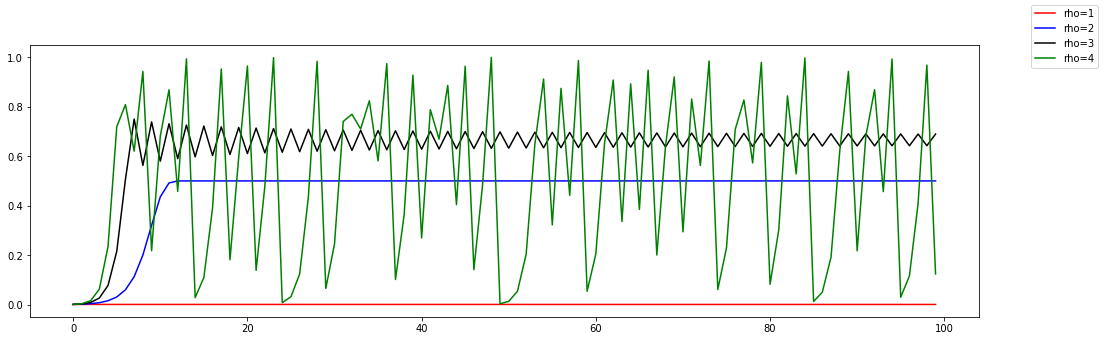

In [20]:
fig, ax = plt.subplots(figsize=(17, 5))
ax.plot(logistic_map(rho=1, a0=0.001, n=100), label='rho=1', color='red')
ax.plot(logistic_map(rho=2, a0=0.001, n=100), label='rho=2', color='blue')
ax.plot(logistic_map(rho=3, a0=0.001, n=100), label='rho=3', color='black')
ax.plot(logistic_map(rho=4, a0=0.001, n=100), label='rho=4', color='green')
fig.legend()
plt.show()

In [46]:
def normalize(x):
    return ((x - min(x)) / (max(x) - min(x)) - 0.5) * 2

In [47]:
s5 = normalize(s1+s4)
s6 = normalize(s2+s4)
s7 = normalize(s3+s4)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [62]:
type(s1)

pandas.core.frame.DataFrame

NameError: name 's5' is not defined

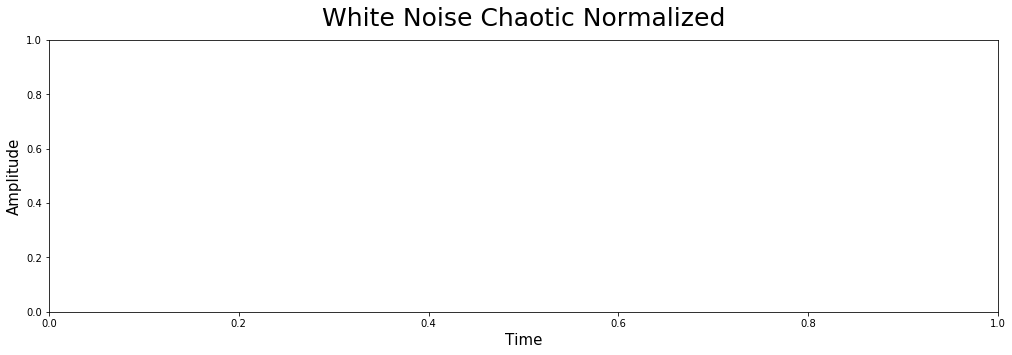

In [45]:
plt.figure(figsize=(17, 5))
plt.title('White Noise Chaotic Normalized', fontdict={'fontsize': '25'}, y=1.03)
plt.xlabel('Time', fontdict={'fontsize': '15'})
plt.ylabel('Amplitude', fontdict={'fontsize': '15'})
plt.plot(s5, color='#0100FF')
# plt.savefig('./images/s5.png', format='png', dpi=400)
plt.show()

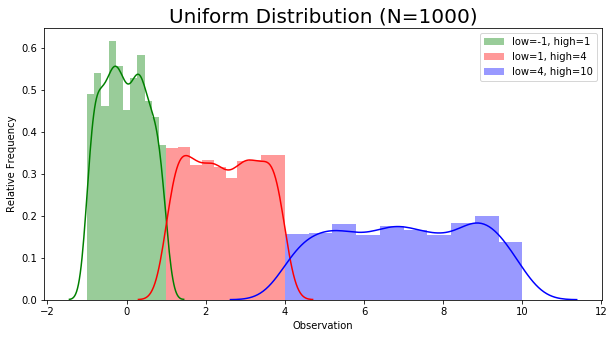

In [30]:
plt.figure(figsize=(10, 5))

low, high = -1, 1
uniform = np.random.uniform(low, high, 1000)
sns.distplot(uniform, color='green', label='low=-1, high=1')

low, high = 1, 4
uniform = np.random.uniform(low, high, 1000)
sns.distplot(uniform, color='red', label='low=1, high=4')

low, high = 4, 10
uniform = np.random.uniform(low, high, 1000)
sns.distplot(uniform, color='blue', label='low=4, high=10')

plt.title('Uniform Distribution (N=1000)', fontdict={'fontsize': 20})
plt.xlabel('Observation')
plt.ylabel('Relative Frequency')
plt.legend(loc='best')
plt.show()
# Reference: https://www.researchgate.net/figure/Histogram-of-uniform-distribution-and-
# line-for-the-fitted-distribution_fig1_228390422

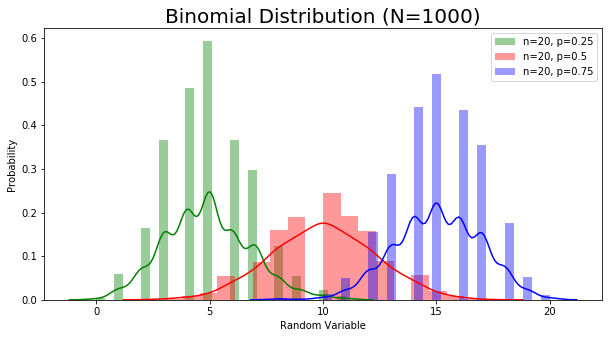

In [31]:
plt.figure(figsize=(10, 5))

n, p = 20, 0.25
binomial = np.random.binomial(n, p, 1000)
sns.distplot(binomial, color='green', label='n=20, p=0.25')

n, p = 20, 0.5
binomial = np.random.binomial(n, p, 1000)
sns.distplot(binomial, color='red', label='n=20, p=0.5')

n, p = 20, 0.75
binomial = np.random.binomial(n, p, 1000)
sns.distplot(binomial, color='blue', label='n=20, p=0.75')

plt.title('Binomial Distribution (N=1000)', fontdict={'fontsize': 20})
plt.xlabel('Random Variable')
plt.ylabel('Probability')
plt.legend(loc='best')
plt.show()
# Reference: https://www.statisticshowto.datasciencecentral.com/negative-binomial-experiment/

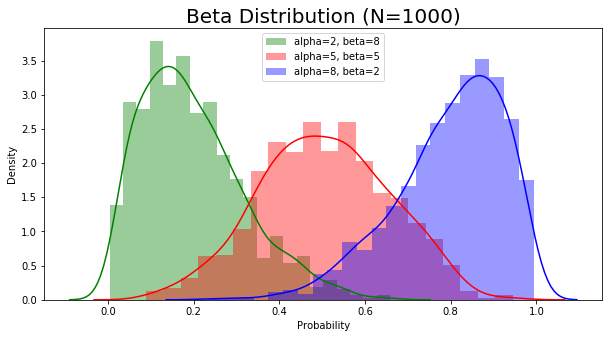

In [32]:
plt.figure(figsize=(10, 5))

alpha, beta = 2, 8
beta = np.random.beta(alpha, beta, 1000)
sns.distplot(beta, color='green', label='alpha=2, beta=8')

alpha, beta = 5, 5
beta = np.random.beta(alpha, beta, 1000)
sns.distplot(beta, color='red', label='alpha=5, beta=5')

alpha, beta = 8, 2
beta = np.random.beta(alpha, beta, 1000)
sns.distplot(beta, color='blue', label='alpha=8, beta=2')

plt.title('Beta Distribution (N=1000)', fontdict={'fontsize': 20})
plt.xlabel('Probability')
plt.ylabel('Density')
plt.legend(loc='best')
plt.show()
# Reference: https://www.vosesoftware.com/riskwiki/Betadistribution.php

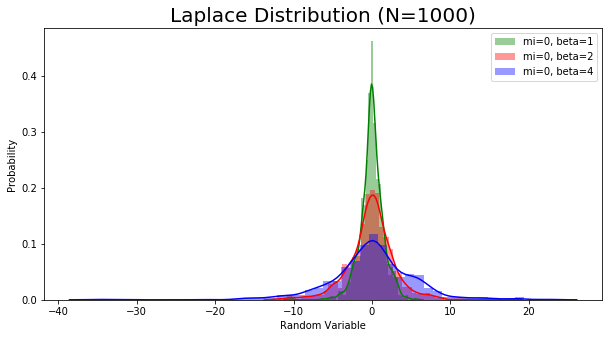

In [33]:
plt.figure(figsize=(10, 5))

loc, scale = 0, 1
laplace = np.random.laplace(loc, scale, 1000)
sns.distplot(laplace, color='green', label='mi=0, beta=1')

loc, scale = 0, 2
laplace = np.random.laplace(loc, scale, 1000)
sns.distplot(laplace, color='red', label='mi=0, beta=2')

loc, scale = 0, 4
laplace = np.random.laplace(loc, scale, 1000)
sns.distplot(laplace, color='blue', label='mi=0, beta=4')

plt.title('Laplace Distribution (N=1000)', fontdict={'fontsize': 20})
plt.xlabel('Random Variable')
plt.ylabel('Probability')
plt.legend(loc='best')
plt.show()
# Reference: https://www.statisticshowto.datasciencecentral.com/laplace-
# distribution-double-exponential/

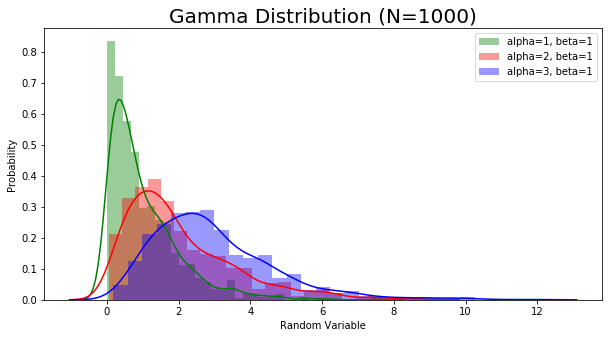

In [34]:
plt.figure(figsize=(10, 5))

alpha, beta = 1, 1
gamma = np.random.gamma(alpha, beta, 1000)
sns.distplot(gamma, color='green', label='alpha=1, beta=1')

alpha, beta = 2, 1
gamma = np.random.gamma(alpha, beta, 1000)
sns.distplot(gamma, color='red', label='alpha=2, beta=1')

alpha, beta = 3, 1
gamma = np.random.gamma(alpha, beta, 1000)
sns.distplot(gamma, color='blue', label='alpha=3, beta=1')

plt.title('Gamma Distribution (N=1000)', fontdict={'fontsize': 20})
plt.xlabel('Random Variable')
plt.ylabel('Probability')
plt.legend(loc='best')
plt.show()
# Reference: https://en.wikipedia.org/wiki/Inverse-gamma_distribution

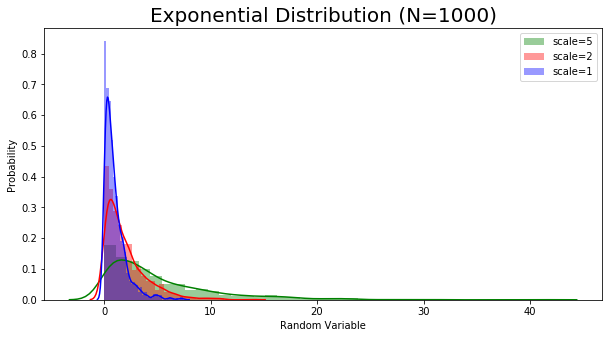

In [35]:
plt.figure(figsize=(10, 5))

scale = 5
exponential = np.random.exponential(scale, 1000)
sns.distplot(exponential, color='green', label='scale=5')

scale = 2
exponential = np.random.exponential(scale, 1000)
sns.distplot(exponential, color='red', label='scale=2')

scale = 1
exponential = np.random.exponential(scale, 1000)
sns.distplot(exponential, color='blue', label='scale=1')

plt.title('Exponential Distribution (N=1000)', fontdict={'fontsize': 20})
plt.xlabel('Random Variable')
plt.ylabel('Probability')
plt.legend(loc='best')
plt.show()
# Reference: https://www.vosesoftware.com/riskwiki/Exponentialdistribution.php

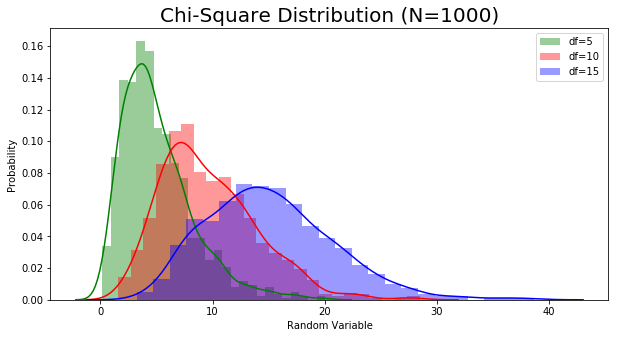

In [36]:
plt.figure(figsize=(10, 5))

df = 5
quiquadrado = np.random.chisquare(df, 1000)
sns.distplot(quiquadrado, color='green', label='df=5')

df = 10
quiquadrado = np.random.chisquare(df, 1000)
sns.distplot(quiquadrado, color='red', label='df=10')

df = 15
quiquadrado = np.random.chisquare(df, 1000)
sns.distplot(quiquadrado, color='blue', label='df=15')

plt.title('Chi-Square Distribution (N=1000)', fontdict={'fontsize': 20})
plt.xlabel('Random Variable')
plt.ylabel('Probability')
plt.legend(loc='best')
plt.show()
# Reference: https://www.globalspec.com/reference/69594/203279/10-8-
# the-chi-square-distribution

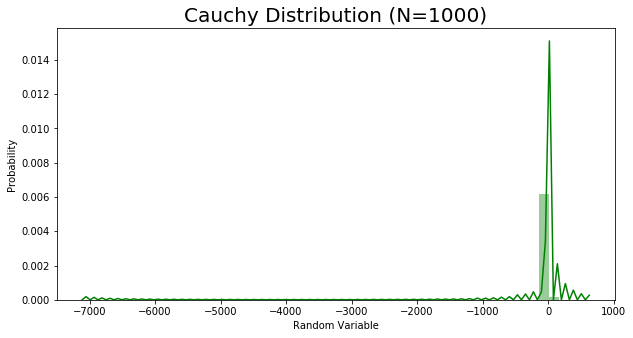

In [37]:
plt.figure(figsize=(10, 5))

df = 1000
cauchy = np.random.standard_cauchy(df)
sns.distplot(cauchy, color='green',)


plt.title('Cauchy Distribution (N=1000)', fontdict={'fontsize': 20})
plt.xlabel('Random Variable')
plt.ylabel('Probability')
plt.show()
# Reference: https://www.globalspec.com/reference/69594/203279/10-
# 8-the-chi-square-distribution

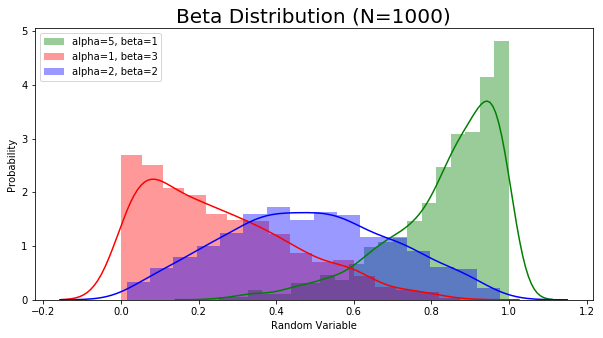

In [38]:
plt.figure(figsize=(10, 5))

alpha, beta = 5, 1
beta = np.random.beta(alpha, beta, 1000)
sns.distplot(beta, color='green', label='alpha=5, beta=1')

alpha, beta = 1, 3
beta = np.random.beta(alpha, beta, 1000)
sns.distplot(beta, color='red', label='alpha=1, beta=3')

alpha, beta = 2, 2
beta = np.random.beta(alpha, beta, 1000)
sns.distplot(beta, color='blue', label='alpha=2, beta=2')


plt.title('Beta Distribution (N=1000)', fontdict={'fontsize': 20})
plt.xlabel('Random Variable')
plt.ylabel('Probability')
plt.legend(loc='best')
plt.show()
# Reference: https://en.wikipedia.org/wiki/Beta_distribution

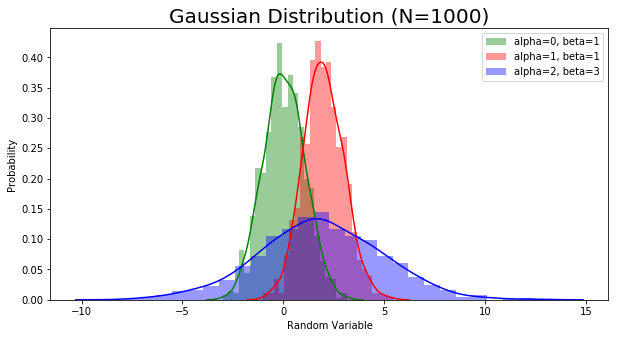

In [39]:
plt.figure(figsize=(10, 5))

alpha, beta = 0, 1
gaussian = np.random.normal(alpha, beta, 1000)
sns.distplot(gaussian, color='green', label='alpha=0, beta=1')

alpha, beta = 2, 1
gaussian = np.random.normal(alpha, beta, 1000)
sns.distplot(gaussian, color='red', label='alpha=1, beta=1')

alpha, beta = 2, 3
gaussian = np.random.normal(alpha, beta, 1000)
sns.distplot(gaussian, color='blue', label='alpha=2, beta=3')

plt.title('Gaussian Distribution (N=1000)', fontdict={'fontsize': 20})
plt.xlabel('Random Variable')
plt.ylabel('Probability')
plt.legend(loc='best')
plt.show()
# Reference: https://en.wikipedia.org/wiki/Q-Gaussian_distribution